In [5]:
import os
import random
import csv

specimen_labels = [l.split('\t') for l in open('./specimen_taxonomy.txt').read().splitlines()[1:]]
specimen_labels = {lbl[0]: lbl[1:] for lbl in specimen_labels if not lbl[0].startswith('google')}
specimen_list = os.listdir('rawcolor_db/images')
genus = set([specimen_labels[spc][2] for spc in specimen_list if specimen_labels[spc][2]!='Unknown'])
specimens_per_genus = {g: [spc for spc in specimen_list if specimen_labels[spc][2]==g] for g in genus}
images_per_genus = {g: [] for g in genus}
for g in genus:
    for spc in specimens_per_genus[g]:
        fns = open('rawcolor_db/subsets/{}-timeseries.lst'.format(spc)).read().splitlines()
        images_per_genus[g].extend(fns)
    random.shuffle(images_per_genus[g])
    print g, len(specimens_per_genus[g]), len(images_per_genus[g])
    
# Write CSV file
with open('turk_csv/examples.csv', 'w') as f:
    header = ['"genus_label"', '"example_img"', ] + ['"img_url{}-{}"'.format(i+1, part) for i in range(10) for part in ('head', 'tail')]
    base_url = 'https://s3-us-west-1.amazonaws.com/plankton-phase2'
    f.write(','.join(header)+'\n')
    for g in genus:
        row = ['"{}"'.format(g), '"https://www.incrediblemos.com/wp-content/uploads/2017/10/under-construction.jpg"'] 
        row += ['"{}/{}"'.format(base_url, images_per_genus[g][i]) for i in range(10) for part in ('head', 'tail')]
        f.write(','.join(row)+'\n')
        
ksjkdnc

    
classA = ['Acartiidae (family)', 'Calanoida (order)', 'Calanus', 'Tortanus', 'Oithonidae (family)', 
          'Poecilostomatoida (family)', 'Pontellidae (family)', 'Euphausiidae (family)', 'Brachyura (family)', 
          'Mysida (order)', 'Gammaridae (family)', 'Ostracoda (class)', 'Sergestidae (family)', 'Copepoda Nauplia (subclass)']
classB = ['Saggittoidea (class)', 'Appendicularia (class)', 'Diphyidae (family)', 'Polychaeta (class)']
classC = ['Cydippida (order)', 'Hydromedusae (order)', 'Polychaeta (class)']

images2annotate = {}
specimen_list = sorted(os.listdir('rawcolor_db/images'))
data = [['example_img', ] + ['img_url{}-{}'.format(i+1, part) for i in range(10) for part in ('head', 'tail')]]
for i, spc in enumerate(specimen_list):
    genus = taxonomy[spc][-1]
    if genus in classA or genus in classB:
        fns = open('rawcolor_db/subsets/{}-timeseries.lst'.format(spc)).read().splitlines()
        random.shuffle(fns)
        images2annotate[spc] = fns[:10]
    
        imgs = ['"https://www.incrediblemos.com/wp-content/uploads/2017/10/under-construction.jpg"']
        for i in range(10):
            imgs.append('https://s3-us-west-1.amazonaws.com/plankton-phase2/'+images2annotate[spc][i])
            imgs.append('https://s3-us-west-1.amazonaws.com/plankton-phase2/'+images2annotate[spc][i])
        data.append(imgs)

with open('turk_csv/examples.csv', 'w') as f:
    for dt in data:
        f.write(','.join(['"{}"'.format(e) for e in dt]))
        f.write('\n')

Mysida (order) 3 2498
Gammaridae (family) 11 8567
Hydromedusae (order) 12 10250
Acartiidae (family) 5 3250
Poecilostomatoida (family) 8 7274
Pontellidae (family) 1 501
Calanus 2 1974
Oithonidae (family) 5 3536
Copepoda Nauplia (subclass) 1 1049
Tortanus 1 643
Appendicularia (class) 2 1563
Ostracoda (class) 2 1558
Polychaeta (class) 12 9039
Calanoida (order) 29 25681
Cydippida (order) 2 2221
Brachyura (family) 6 5048
Diphyidae (family) 1 908
Saggittoidea (class) 1 1002
Euphausiidae (family) 4 3988


NameError: name 'ksjkdnc' is not defined

In [52]:
import os
import random
import csv

specimen_labels = [l.split('\t') for l in open('./specimen_taxonomy.txt').read().splitlines()[1:]]
specimen_labels = {lbl[0]: lbl[1:] for lbl in specimen_labels if not lbl[0].startswith('google')}
specimen_list = os.listdir('rawcolor_db/images')
spc_images, spc_example = {}, {}
corresp = {l.split()[1].replace('/', '_'): l.split()[0] for l in open('turk_results/turk_db_correspondance.lst').read().splitlines()}

examples = {}
for spc in specimen_list:
    cls = specimen_labels[spc][2].split()[0]
    if cls == 'Unknown':
        continue
    if cls in ['Acartiidae', 'Appendicularia', 'Copepoda', 'Cydippida', 'Diphyidae', 'Euphausiidae', 'Gammaridae',
               'Mysida', 'Oithonidae', 'Ostracoda', 'Poecilostomatoida', 'Pontellidae', 'Sergestiidae', 'Saggittoidea', 
               'Tortanus']:
        if cls == 'Diphyidae':
            cls = 'Diphyinae'
        if cls == 'Tortanus':
            cls = 'Toranidae'
        examples[spc] = cls+'.png'
    elif cls == 'Brachyura':
        if corresp[spc] == 'Brachyura_specimen05':
            examples[spc] = 'Brachyura_specimen05.png'
        elif corresp[spc] == 'Brachyura_specimen06':
            examples[spc] = 'Brachyura_specimen06.png'
        else:
            examples[spc] = 'Brachyura.png'
    elif cls == 'Calanus':
        if corresp[spc] == 'Calanidae_specimen00':
            examples[spc] = 'Calanidae_specimen00.png'
        elif corresp[spc] == 'Calanidae_specimen01':
            examples[spc] = 'Calanidae_specimen01.png'
    elif cls == 'Calanoida':
        if corresp[spc] == 'Calanoida_specimen11':
            examples[spc] = 'Calanoida_specimen11.png'
        else:
            examples[spc] = 'Calanoida.png'
    elif corresp[spc] == 'Chordata_specimen00':
        examples[spc] = 'Chordata_specimen00.png'
    elif cls == 'Hydromedusae':
        if corresp[spc] in ['Hydromedusae_specimen{:02d}'.format(i) for i in [0,1,2,3,8,9,10,11,12]]:
            examples[spc] = 'Hydromedusae_specimen00-03_08-12.png'
        elif corresp[spc] in ['Hydromedusae_specimen{:02d}'.format(i) for i in [4,5,6,7]]:
            examples[spc] = 'Hydromedusae_specimen4-7.png'
    elif cls == 'Polychaeta':
        if corresp[spc] in ['Polychaeta_specimen{:02d}'.format(i) for i in [0,1,11]]:
            examples[spc] = 'Polychaeta_specimen00-01_11.png'
        elif corresp[spc] == 'Polychaeta_specimen02':
            examples[spc] = 'Polychaeta_specimen02.png'
        elif corresp[spc] in ['Polychaeta_specimen{:02d}'.format(i) for i in [3,4,5,6,8]]:
            examples[spc] = 'Polychaeta_specimen03-06_08.png'
        elif corresp[spc] in ['Polychaeta_specimen{:02d}'.format(i) for i in [7,10]]:
            examples[spc] = 'Polychaeta_specimen07_10.png'
        elif corresp[spc] == 'Polychaeta_specimen09':
            examples[spc] = 'Polychaeta_specimen09.png'
    assert os.path.exists('turk_csv/newExamples/'+examples[spc])
    
all_rows = []
for spc in specimen_list:
    cls = specimen_labels[spc][2].split()[0]
    if cls == 'Unknown':
        continue
    spc_images[spc] = open('rawcolor_db/subsets/{}-timeseries.lst'.format(spc)).read().splitlines()
    random.shuffle(spc_images[spc])
    for i in range(len(spc_images[spc])/10):
        row = ['"{}/examples/{}"'.format(base_url, examples[spc])] 
        row += ['"{}/{}"'.format(base_url, spc_images[spc][j]) for j in range(i*10, (i+1)*10) for part in ('head', 'tail')]
        all_rows.append(row)
    print spc, cls, len(spc_images[spc]), examples[spc]
    
print len(all_rows)
base_url = 'https://s3-us-west-1.amazonaws.com/plankton-phase2'
header = ['"example_img"', ] + ['"img_url{}-{}"'.format(i+1, part) for i in range(10) for part in ('head', 'tail')]

# Write CSV files
with open('turk_csv/batch1.csv'.format(spc), 'w') as f:
    f.write(','.join(header)+'\n')
    for row in all_rows[:4800]:
        f.write(','.join(row)+'\n')
        
with open('turk_csv/batch2.csv'.format(spc), 'w') as f:
    f.write(','.join(header)+'\n')
    for row in all_rows[4800:]:
        f.write(','.join(row)+'\n')

20170504_006 Euphausiidae 1005 Euphausiidae.png
20170217_002 Acartiidae 727 Acartiidae.png
20170217_005 Polychaeta 1112 Polychaeta_specimen03-06_08.png
20170516_008 Acartiidae 1007 Acartiidae.png
20170221_001 Brachyura 1013 Brachyura.png
20170224_012 Copepoda 1049 Copepoda.png
20170303_001 Polychaeta 1149 Polychaeta_specimen03-06_08.png
20170420_001 Appendicularia 1009 Appendicularia.png
20170126_003 Calanoida 1001 Calanoida.png
20170303_005 Calanoida 762 Calanoida.png
20170509_001 Calanoida 996 Calanoida.png
20170221_003 Brachyura 515 Brachyura.png
20170425_005 Calanoida 932 Calanoida.png
20170224_002 Hydromedusae 1065 Hydromedusae_specimen4-7.png
20170207_001 Calanoida 1053 Calanoida.png
20170217_006 Oithonidae 512 Oithonidae.png
20170224_011 Hydromedusae 506 Hydromedusae_specimen4-7.png
20170425_003 Calanoida 1042 Calanoida_specimen11.png
20170213_002 Hydromedusae 1007 Hydromedusae_specimen00-03_08-12.png
20170214_003 Calanoida 1115 Calanoida.png
20170425_004 Calanoida 1001 Calanoid

In [67]:
import os, csv, json, skimage.io as sio, matplotlib.pyplot as plt

def plot_hit(hit_results):
    hit = json.loads(hit_results[48])
    for i in range(10):
        ann = hit[i]
        img_fn = '/'.join(ann['url'].split('/')[-2:])
        img = plt.imread('rawcolor_db/images/'+img_fn)

        print 'Confidence: ', ann['confidence']
        print 'Focus:      ', ann['focus']
        print 'Z-Dir:      ', ann['z-dir']
        plt.imshow(img)
        plt.axis('off')
        if isinstance(ann['head'], dict) and isinstance(ann['tail'], dict):
            head_x = int(ann['head']['relative_x'] * img.shape[1])
            head_y = int(ann['head']['relative_y'] * img.shape[0])
            tail_x = int(ann['tail']['relative_x'] * img.shape[1])
            tail_y = int(ann['tail']['relative_y'] * img.shape[0])
            plt.gca().arrow(tail_x, tail_y, head_x-tail_x, head_y-tail_y, head_width=10, head_length=15, fc='r', ec='r')
        else:
            print 'Head:       ', ann['head']
            print 'Tail:       ', ann['tail']
        plt.show()

import random
batch_rslt = list(csv.reader(open('/data5/morgado/projects/plankton/turk/results/Batch1_3113691.csv')))
header, batch_rslt = batch_rslt[0], batch_rslt[1:]
all_workers = list(set([rst[15] for rst in batch_rslt]))
print len(batch_rslt), len(all_workers)
i=0

Worker ID:  A3LR5YED234XPN
Num HITs:   3

Confidence:  Not Confident
Focus:       In focus
Z-Dir:       Parallel


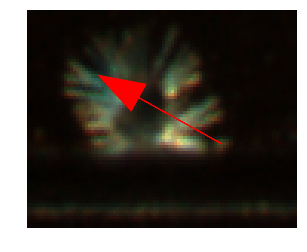

Confidence:  Not Confident
Focus:       In focus
Z-Dir:       Parallel


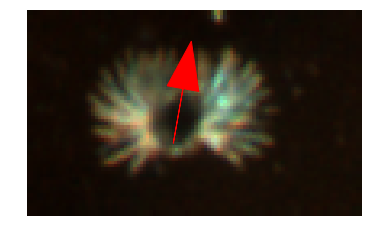

Confidence:  Not Confident
Focus:       In focus
Z-Dir:       Parallel


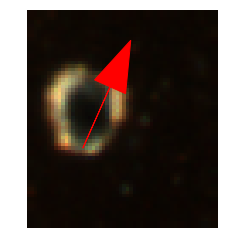

Confidence:  Confident
Focus:       In focus
Z-Dir:       Leaning away from camera


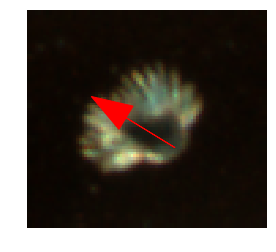

Confidence:  Confident
Focus:       Out of focus
Z-Dir:       Leaning toward camera


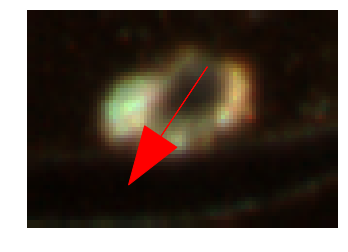

Confidence:  Confident
Focus:       In focus
Z-Dir:       Leaning away from camera


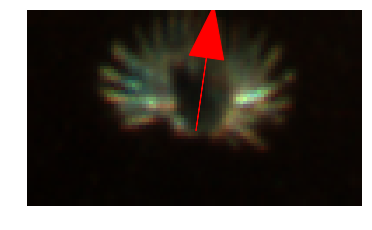

Confidence:  Confident
Focus:       In focus
Z-Dir:       Parallel


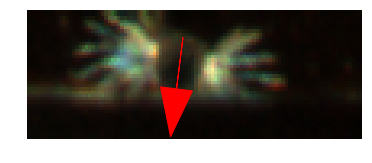

Confidence:  Confident
Focus:       In focus
Z-Dir:       Parallel


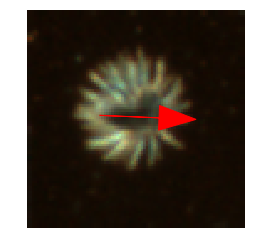

Confidence:  Confident
Focus:       In focus
Z-Dir:       Parallel


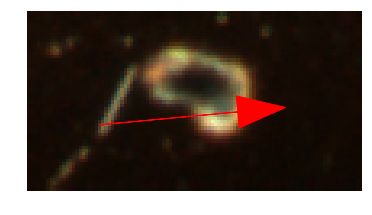

Confidence:  Confident
Focus:       In focus
Z-Dir:       Parallel


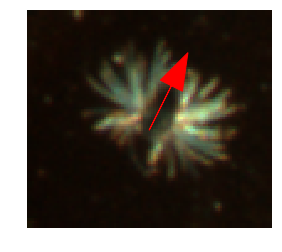

Confidence:  Confident
Focus:       In focus
Z-Dir:       Parallel


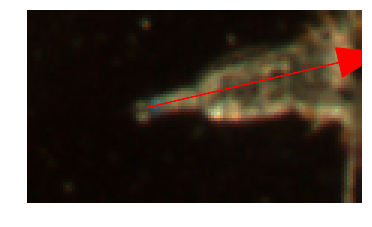

Confidence:  Very Confident
Focus:       In focus
Z-Dir:       Parallel


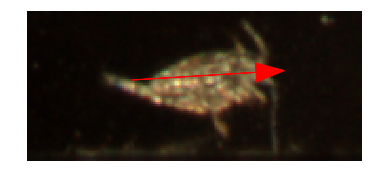

Confidence:  Very Confident
Focus:       In focus
Z-Dir:       Parallel


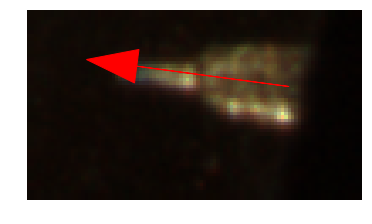

Confidence:  Very Confident
Focus:       In focus
Z-Dir:       Leaning away from camera


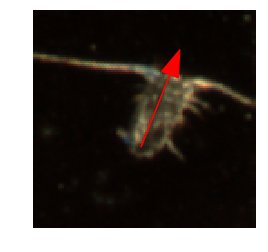

Confidence:  Very Confident
Focus:       In focus
Z-Dir:       Leaning toward camera


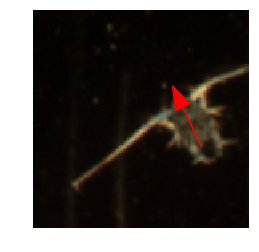

Confidence:  Very Confident
Focus:       In focus
Z-Dir:       Parallel


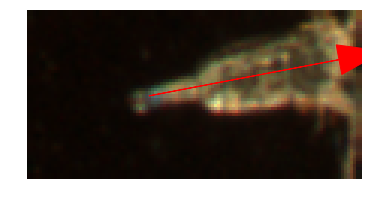

Confidence:  Very Confident
Focus:       In focus
Z-Dir:       Leaning away from camera


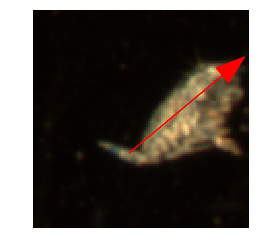

Confidence:  Very Confident
Focus:       In focus
Z-Dir:       Leaning away from camera


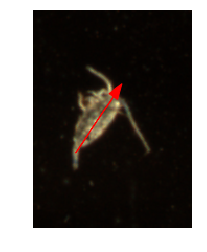

Confidence:  Very Confident
Focus:       In focus
Z-Dir:       Parallel


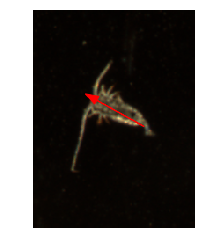

Confidence:  Very Confident
Focus:       In focus
Z-Dir:       Parallel


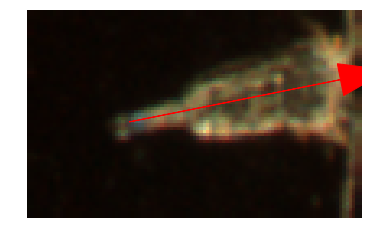

Confidence:  Very Confident
Focus:       In focus
Z-Dir:       Leaning toward camera


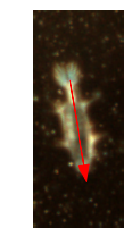

Confidence:  Very Confident
Focus:       In focus
Z-Dir:       Parallel


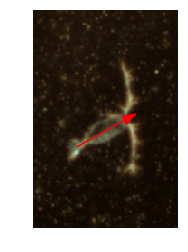

Confidence:  Very Confident
Focus:       In focus
Z-Dir:       Leaning toward camera


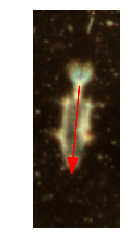

Confidence:  Very Confident
Focus:       In focus
Z-Dir:       Parallel


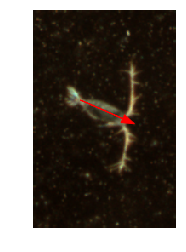

Confidence:  Very Confident
Focus:       In focus
Z-Dir:       Leaning away from camera


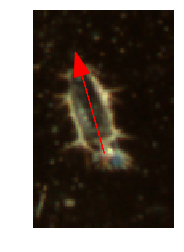

Confidence:  Very Confident
Focus:       In focus
Z-Dir:       Parallel


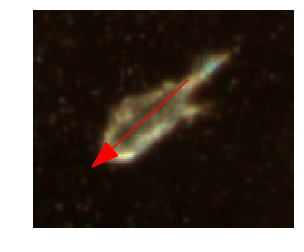

Confidence:  Very Confident
Focus:       In focus
Z-Dir:       Leaning away from camera


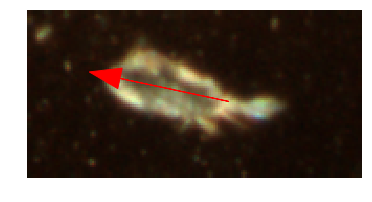

Confidence:  Very Confident
Focus:       In focus
Z-Dir:       Parallel


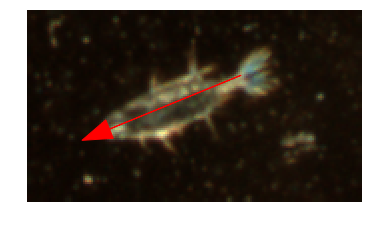

Confidence:  Very Confident
Focus:       In focus
Z-Dir:       Parallel


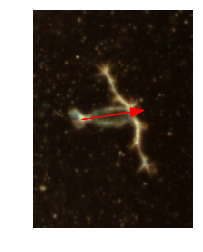

Confidence:  Very Confident
Focus:       In focus
Z-Dir:       Leaning away from camera


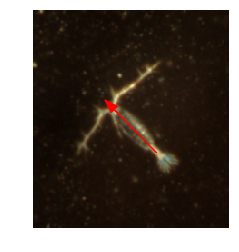

In [91]:
i+=1
wid = all_workers[i]
worker_rslt = [rst for rst in batch_rslt if rst[15]==wid]
print 'Worker ID: ', wid
print 'Num HITs:  ', len(worker_rslt)
print ''

random.shuffle(worker_rslt)
for rst in worker_rslt[:5]:
    plot_hit(rst)